In [84]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

Wiener Process

In [5]:
def Wiener(T, n):
    t, W = 0.0, 0.0
    h = float(T/n)
    sqrt_h = np.sqrt(h)
    for i in range(1, n+1):
        yield t, W
        normal = np.random.normal()
        t = i * h
        W += sqrt_h * normal

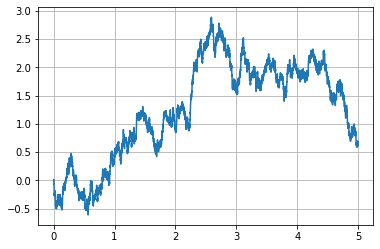

In [37]:
t, W = zip(*Wiener(5, 7000))
pylab.plot(t, W)
pylab.grid(True)
pylab.show()

$Y(t)=W(T)-W(t)$

In [48]:
def Y(T, n):
    t, W = zip(*Wiener(T, n))
    for i in range(0, n):
        yield t[i], W[-1] - W[i]

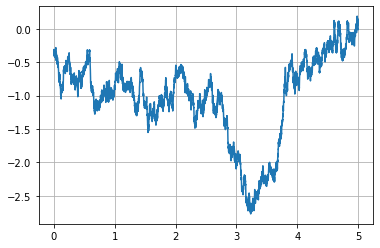

In [52]:
t, Y_ = zip(*Y(5, 7000))
pylab.plot(t, Y_)
pylab.grid(True)
pylab.show()

$Z(t)=\frac{1}{c}W(c^2t)$

In [50]:
def Z(T, n, c):
    t, W = 0.0, 0.0
    h = float(c**2 * T/n)
    sqrt_h = np.sqrt(h)
    for i in range(1, n+1):
        yield t, W / c
        normal = np.random.normal()
        t = i * h
        W += sqrt_h * normal

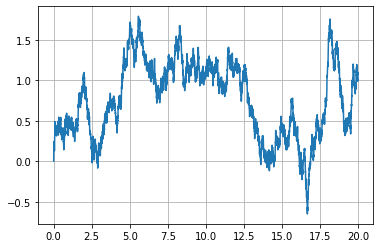

In [45]:
t, Z_ = zip(*Z(5, 7000, 2))
pylab.plot(t, Z_)
pylab.grid(True)
pylab.show()

Integral of the Wiener Process
$\int_{0}^{T} W_t \,dt$

In [61]:
T, n = 5, 7000
t, W = zip(*Wiener(T, n))

def Integral_Wiener1():
    return T * np.mean(W[:-1])


def Integral_Wiener2(): #quadrature
    h = float(T / n)
    s = 0
    for i in range(1, n+1):
        s += W[i-1] * h 
    return s


print(Integral_Wiener1())
print(Integral_Wiener2())

2.8922348274846135
2.894137272118419


Brownian bridge 
$B(t) = W(t) - \frac{t}{T} \cdot W(T)$

In [71]:
def Brownian_bridge(T, n):
    t, W = zip(*Wiener(T, n))
    for i in range(n):
        B = W[i] - (t[i] / T) * W[-1]
        yield t[i], B

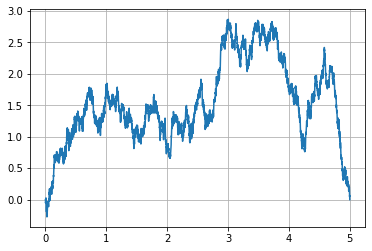

In [72]:
t, B = zip(*Brownian_bridge(5, 7000))
pylab.plot(t, B)
pylab.grid(True)
pylab.show()

Two-dimensional Wiener process

In [81]:
def Wiener_2d(T, n):
    t1, W1 = zip(*Wiener(T, n))
    t2, W2 = zip(*Wiener(T, n))
    return W1, W2

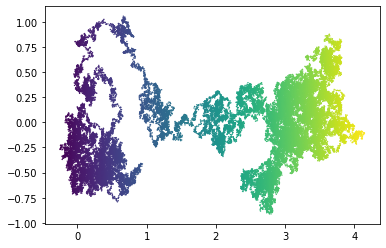

In [82]:
W1, W2 = Wiener_2d(5, 50000)
plt.scatter(W1, W2, c=W1, edgecolor='none', s=2)
plt.show()

Three-dimensional Wiener process

In [85]:
def Wiener_3d(T, n):
    t1, W1 = zip(*Wiener(T, n))
    t2, W2 = zip(*Wiener(T, n))
    t3, W3 = zip(*Wiener(T, n))
    return W1, W2, W3

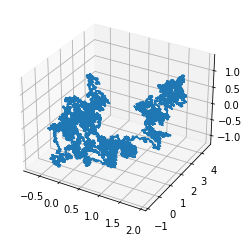

In [87]:
W1, W2, W3 = Wiener_3d(5, 50000)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(W1, W2, W3)
plt.show()

Niech $W^1$ i $W^2$ będą dwoma niezależnymi jednowymiarowymi procesami Wienera. Wówczas, dla $\rho\in [0,1]$
\begin{equation}
    W(t) = \rho \cdot W^1(t)+\sqrt{1-\rho^2} \cdot W^2(t)
\end{equation}
jest jednowymiarowym procesem Wienera, skorelowanym z $W^1$ i $W^2$.

In [89]:
def Wiener_paths(T, n, p):
    t, W1 = zip(*Wiener(T, n))
    t, W2 = zip(*Wiener(T, n))
    for i in range(n):
        W = p * W1[i] + np.sqrt(1 - p**2) * W2[i]
        yield t[i], W1[i], W2[i], W

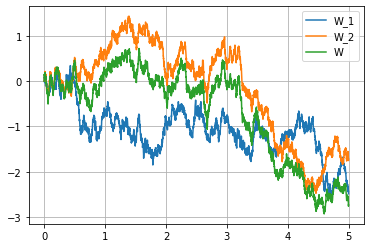

In [98]:
t, W1, W2, W = zip(*Wiener_paths(5, 5000, 0.5))

plt.plot(t, W1, label = 'W_1')
plt.plot(t, W2, label = 'W_2')
plt.plot(t, W, label = 'W')
plt.legend()
plt.grid(True)
plt.show()